# LITMUS Run Example

In this file, we demonstrate how to use litmus's hessian scan in the most bare-bones way. First, importa ll relevant files:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import litmus

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


Fitting complete.


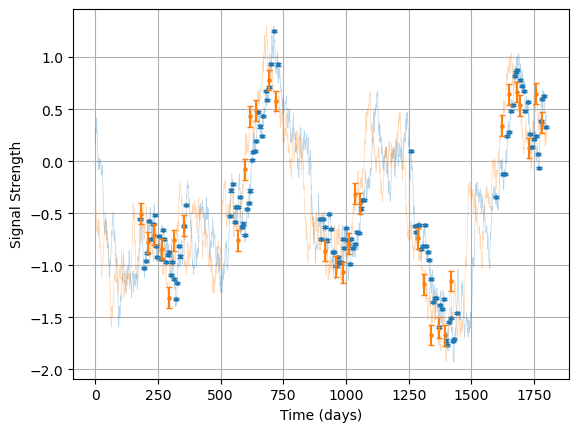

Tried to configure bad keys:	optimizer_args_init	


In [38]:

mymock = litmus.mocks.mock(3)
mymock.plot()

my_model = litmus.models.GP_simple()

fitting_method = litmus.fitting_methods.hessian_scan(stat_model=my_model,
                                                  Nlags=32,
                                                  init_samples=5_000,
                                                  grid_bunching=0.8,
                                                  optimizer_args={'tol': 1E-3,
                                                                  'maxiter': 256,
                                                                  'increase_factor': 1.1,
                                                                  },
                                                  optimizer_args_init={'tol': 1E-4,
                                                                  'maxiter': 1024,
                                                                  'increase_factor': 1.01,
                                                                  },
                                                  reverse=False,
                                                  debug=False
                                                  )

litmus_handler = litmus.LITMUS(fitting_method)
data = my_model.lc_to_data(mymock.lc_1, mymock.lc_2)

seed_params = my_model.find_seed(data)
litmus_handler.add_lightcurve(mymock.lc_1)
litmus_handler.add_lightcurve(mymock.lc_2)

Starting Hessian Scan 
Beginning scan at constrained-space position: 
	 lag: 	 29.81 
	 logtau: 	 5.50 
	 logamp: 	 -0.38 
	 rel_amp: 	 1.11 
	 mean: 	 -0.46 
	 rel_mean: 	 0.05 
Log-Density for this is: 15.54 
Moving to new location... 
Optimizer settled at new fit: 
	 lag: 	 29.81 
	 logtau: 	 0.01 
	 logamp: 	 2.92 
	 rel_amp: 	 2.28 
	 mean: 	 -2.85 
	 rel_mean: 	 2.00 
Log-Density for this is: -664.69 


Warning! Optimization seems to have diverged. Defaulting to seed params. 
Please consider running with different optim_init inputs 


::::::::::::::::::::::: 
Scanning at lag=0.00 ... 
Change of -4118811.50 against 10.00 
Unable to converge at itteration 0 / 32 
::::::::::::::::::::::: 
Scanning at lag=24.76 ... 
Change of 6.14 against 10.00 
Seems to have converged at itteration 1 / 32 
::::::::::::::::::::::: 
Scanning at lag=27.19 ... 
Change of 1.12 against 10.00 
Seems to have converged at itteration 2 / 32 
::::::::::::::::::::::: 
Scanning at lag=28.52 ... 
Change of 0.04 against 10.00 
Seems to have converged at itteration 3 / 32 
::::::::::::::::::::::: 
Scanning at lag=29.09 ... 
Change of 0.04 against 10.00 
Seems to have converged at itteration 4 / 32 
::::::::::::::::::::::: 
Scanning at lag=29.66 ... 
Change of 0.05 against 10.00 
Seems to have converged at itteration 5 / 32 
::::::::::::::::::::::: 
Scanning at lag=30.24 ... 
Change of 0.00 against 10.00 
Seems to have converged at itteration 6 / 32 
::::::::::::::::::::::: 
Scanning at lag=30.81 ... 
Change of 0.03 against 10.00 
Seems to have converg

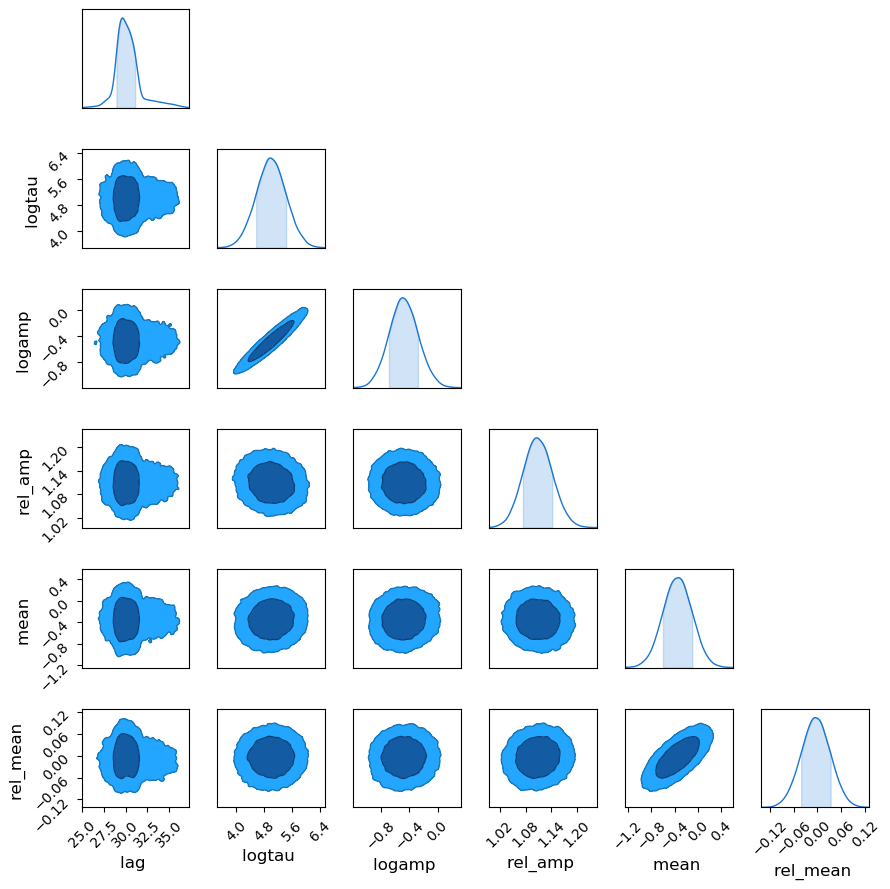

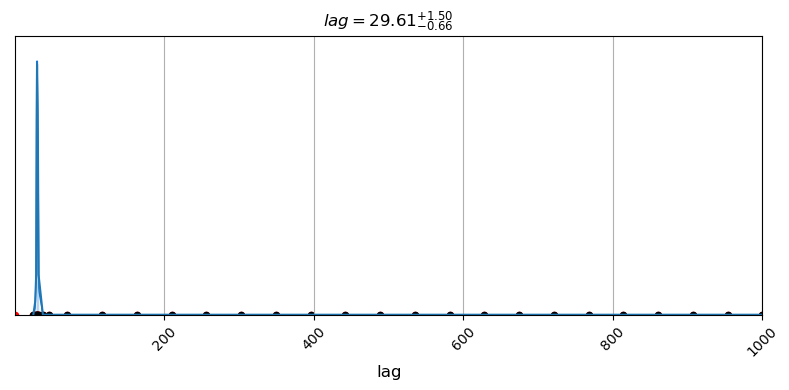

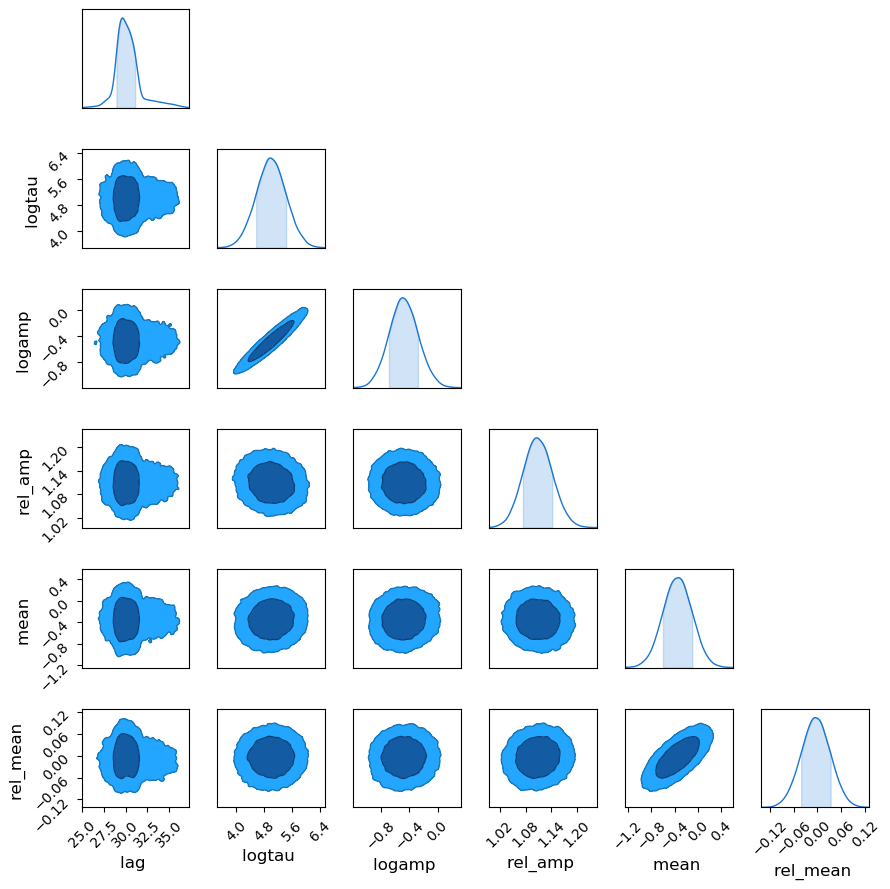

In [39]:
litmus_handler.fit()

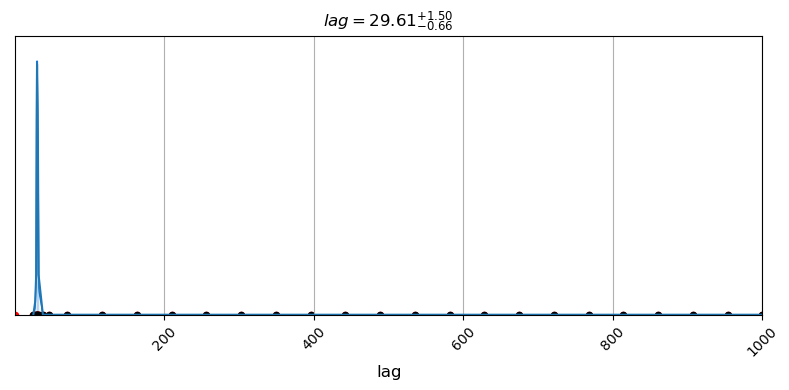

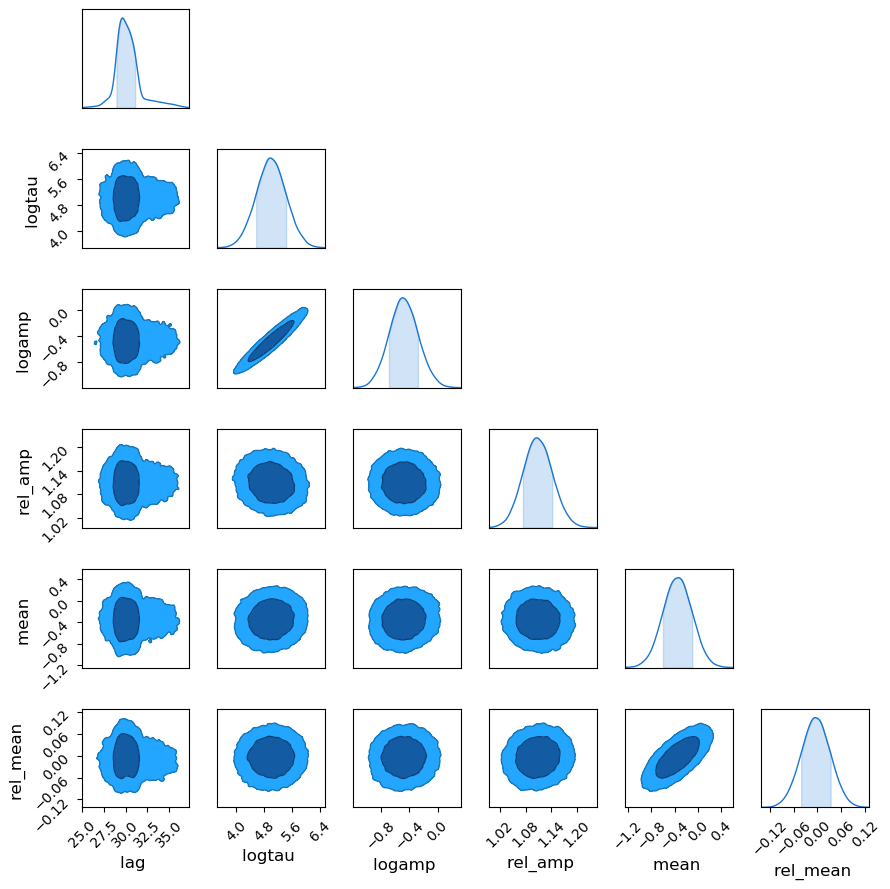

In [41]:
litmus_handler.lag_plot()
litmus_handler.plot_parameters()
plt.show()
